In [ ]:
!pip install -q mesa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.7/425.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 11

In [123]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [211]:
def generar_estimulo(coclea, largo):
  '''Genera un estímulo de largo 'largo' en la red coclea'''
  max = len(coclea) - largo
  inicio_estim = np.random.randint(0, max+1)
  return list(range(inicio_estim, inicio_estim + largo))

def generar_estimulos_dist_reg(coclea, largo, distancia_interestim):
  '''Genera estímulos de largo 'largo' en la red coclea con una distancia entre ellos de 'distancia_interestim'''
  max = len(coclea) - (largo * 2 + distancia_interestim)
  inicio_estim = np.random.randint(0, max+1)
  estimulos = []
  for i in range (inicio_estim, inicio_estim + largo):
    estimulos.append(i)
  for i in range (inicio_estim + largo + distancia_interestim, inicio_estim + largo*2 + distancia_interestim):
    estimulos.append(i)
  return estimulos
  
def generar_estimulos_dist_rand(coclea, largo_max):
  largo = np.random.randint(1, largo_max)
  estim1 = generar_estimulo(coclea, largo)
  largo = np.random.randint(1, largo_max)
  estim2 = generar_estimulo(coclea, largo)
  return estim1 + estim2
  
  

def vertices_estimulo(nucleo, estimulo):
  '''Devuelve los vértices del núcleo que están en el estímulo'''
  edges_estimulo = []
  for j in nucleo.edges():
    if j[0] in estimulo or j[1] in estimulo:
      edges_estimulo.append(j)
  return edges_estimulo

def actualizar_pesos(nucleo, edges_estimulo, estimulo):
  '''Actualiza los pesos de las aristas del núcleo que están en el estímulo'''
  for j in edges_estimulo:
    if j[0] in estimulo and j[1] in estimulo:
      nucleo[j[0]][j[1]]['weight'] = nucleo[j[0]][j[1]]['weight'] + 1
    else:
      nucleo[j[0]][j[1]]['weight'] = nucleo[j[0]][j[1]]['weight'] - 1
      
      
def eliminar_pesos_negativos(nucleo):
  '''Elimina las aristas con peso negativo'''
  for j in list(nucleo.edges()):
    if nucleo[j[0]][j[1]]['weight'] < 0:
      nucleo.remove_edge(j[0], j[1])

In [220]:
generar_estimulos_dist_rand(coclea, 7)

[25, 26, 27, 28, 29, 30, 6]

In [194]:
#Parámetros
n_neu = 50
l_estim = 8
pasos = 750
peso_inicial = 10

In [181]:
def iniciar_red (n_neu, peso_inicial):
    coclea = list(range(0, n_neu))

    nucleo = nx.complete_graph(n_neu)


    #Inicialización de pesos
    for u, v in nucleo.edges():
        nucleo[u][v]['weight'] = peso_inicial
    return nucleo, coclea    


In [48]:
nucleo.edges(data = True)

EdgeDataView([(0, 1, {'weight': 10}), (0, 2, {'weight': 10}), (0, 3, {'weight': 10}), (0, 4, {'weight': 10}), (0, 5, {'weight': 10}), (0, 6, {'weight': 10}), (0, 7, {'weight': 10}), (0, 8, {'weight': 10}), (0, 9, {'weight': 10}), (0, 10, {'weight': 10}), (0, 11, {'weight': 10}), (0, 12, {'weight': 10}), (0, 13, {'weight': 10}), (0, 14, {'weight': 10}), (0, 15, {'weight': 10}), (0, 16, {'weight': 10}), (0, 17, {'weight': 10}), (0, 18, {'weight': 10}), (0, 19, {'weight': 10}), (0, 20, {'weight': 10}), (0, 21, {'weight': 10}), (0, 22, {'weight': 10}), (0, 23, {'weight': 10}), (0, 24, {'weight': 10}), (0, 25, {'weight': 10}), (0, 26, {'weight': 10}), (0, 27, {'weight': 10}), (0, 28, {'weight': 10}), (0, 29, {'weight': 10}), (0, 30, {'weight': 10}), (0, 31, {'weight': 10}), (0, 32, {'weight': 10}), (0, 33, {'weight': 10}), (0, 34, {'weight': 10}), (0, 35, {'weight': 10}), (0, 36, {'weight': 10}), (0, 37, {'weight': 10}), (0, 38, {'weight': 10}), (0, 39, {'weight': 10}), (0, 40, {'weight': 1

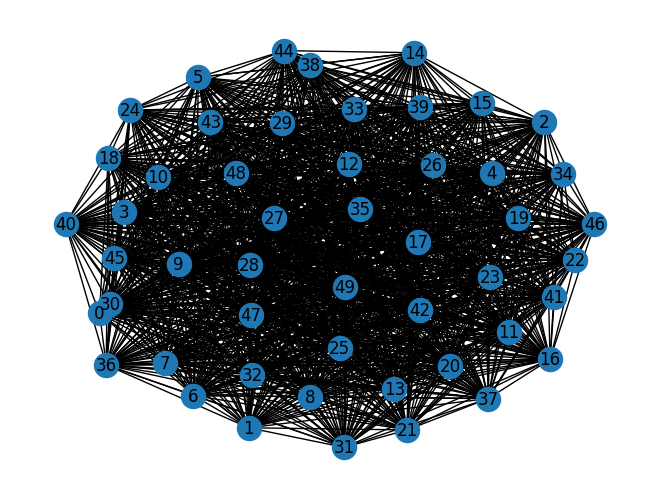

In [52]:
#plot nucleo
nx.draw(nucleo, with_labels=True)

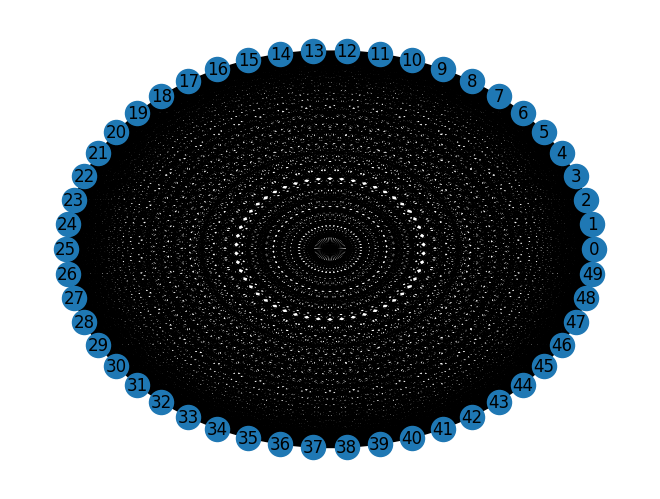

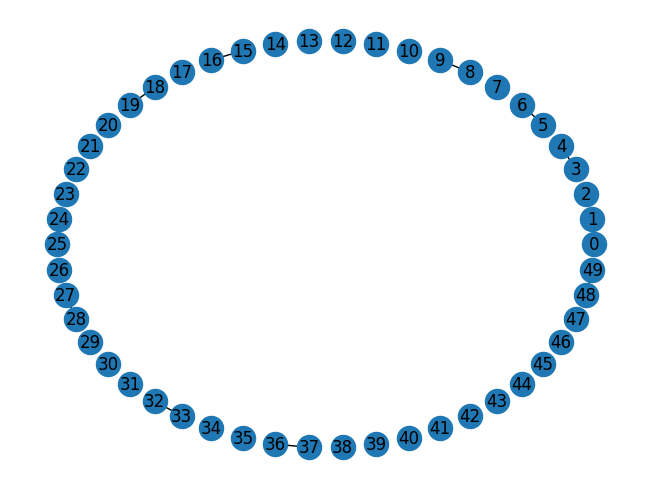

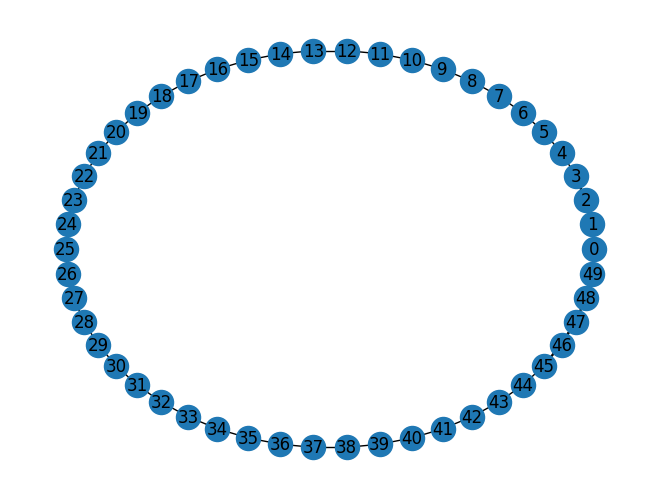

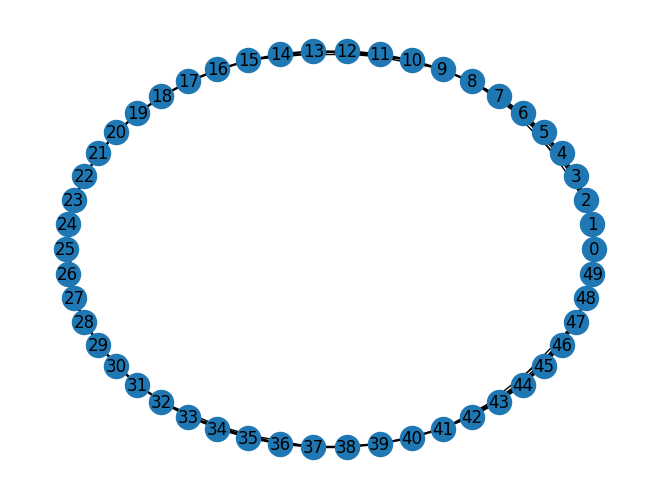

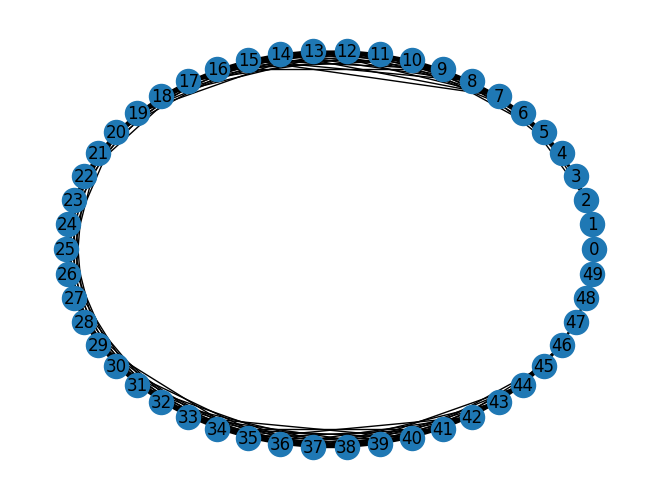

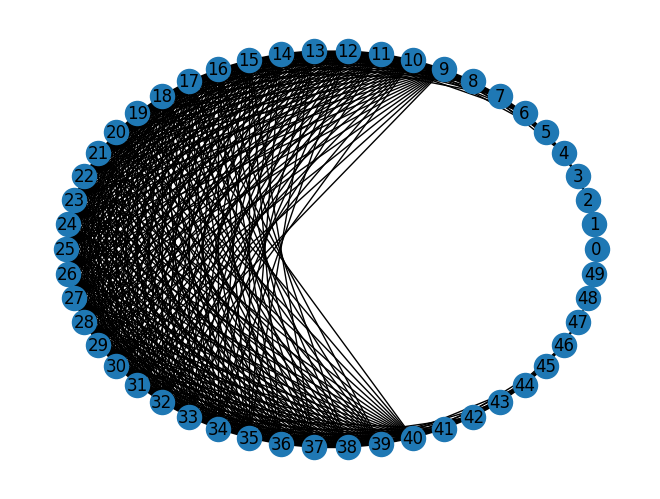

In [195]:
largos_estim = [2, 4, 8, 16, 32]
lista_listas_ver = []
listas_pesos = []

nucleo, coclea = iniciar_red (n_neu, peso_inicial)
pos = nx.circular_layout(nucleo)
nx.draw(nucleo, pos, with_labels=True)
plt.show()

for l_estim in largos_estim:
  nro_vertices = []
  nucleo, coclea = iniciar_red (n_neu, peso_inicial)
  for i in range(pasos):
    
    estim = generar_estimulo(coclea, l_estim)

    edges_estimulo = vertices_estimulo(nucleo, estim)
    
    actualizar_pesos(nucleo, edges_estimulo, estim)
    
    eliminar_pesos_negativos(nucleo)

    nro_vertices.append(len(list(nucleo.edges())))
    
  pos = nx.circular_layout(nucleo)
  nx.draw(nucleo, pos, with_labels=True)
  plt.show()
  
  lista_listas_ver.append(nro_vertices)
  listas_pesos.append([nucleo[u][v]['weight'] for u, v in nucleo.edges()])


In [37]:
nucleo.edges(data = True)

EdgeDataView([(0, 1, {'weight': 23}), (0, 2, {'weight': 2}), (1, 2, {'weight': 36}), (1, 3, {'weight': 12}), (2, 3, {'weight': 54}), (2, 4, {'weight': 34}), (2, 5, {'weight': 10}), (3, 4, {'weight': 82}), (3, 5, {'weight': 58}), (3, 6, {'weight': 34}), (3, 7, {'weight': 14}), (4, 5, {'weight': 98}), (4, 6, {'weight': 74}), (4, 7, {'weight': 54}), (5, 6, {'weight': 122}), (5, 7, {'weight': 102}), (5, 8, {'weight': 18}), (6, 7, {'weight': 150}), (6, 8, {'weight': 66}), (6, 9, {'weight': 1}), (7, 8, {'weight': 106}), (7, 9, {'weight': 41}), (8, 9, {'weight': 119}), (8, 10, {'weight': 54}), (9, 10, {'weight': 133}), (9, 11, {'weight': 49}), (10, 11, {'weight': 116}), (10, 12, {'weight': 55}), (11, 12, {'weight': 151}), (11, 13, {'weight': 83}), (12, 13, {'weight': 145}), (12, 14, {'weight': 81}), (13, 14, {'weight': 145}), (13, 15, {'weight': 75}), (14, 15, {'weight': 131}), (14, 16, {'weight': 62}), (15, 16, {'weight': 142}), (15, 17, {'weight': 60}), (16, 17, {'weight': 126}), (16, 18, {

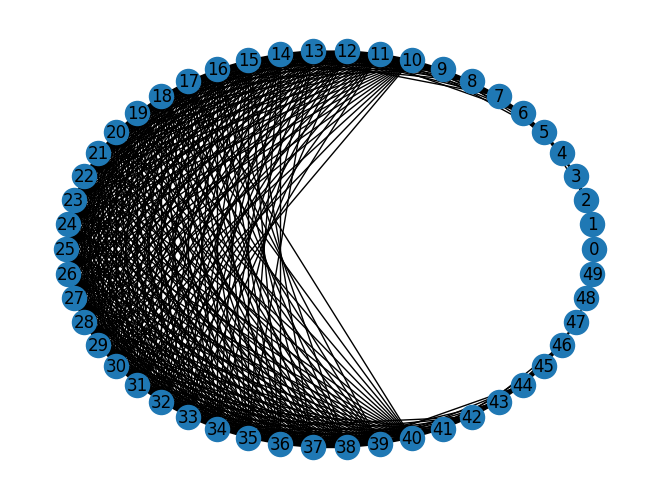

In [142]:
#plot nucleo
#nx.draw(nucleo, with_labels=True)
pos = nx.circular_layout(nucleo)
nx.draw(nucleo, pos, with_labels=True)

In [137]:
nucleo.degree()

DegreeView({0: 1, 1: 3, 2: 4, 3: 4, 4: 5, 5: 8, 6: 8, 7: 10, 8: 10, 9: 12, 10: 26, 11: 26, 12: 27, 13: 28, 14: 29, 15: 29, 16: 29, 17: 31, 18: 30, 19: 30, 20: 30, 21: 30, 22: 30, 23: 30, 24: 30, 25: 30, 26: 30, 27: 30, 28: 30, 29: 30, 30: 30, 31: 30, 32: 30, 33: 29, 34: 29, 35: 29, 36: 28, 37: 28, 38: 28, 39: 27, 40: 27, 41: 13, 42: 12, 43: 9, 44: 8, 45: 6, 46: 5, 47: 3, 48: 2, 49: 1})

Text(0, 0.5, 'Número de vértices')

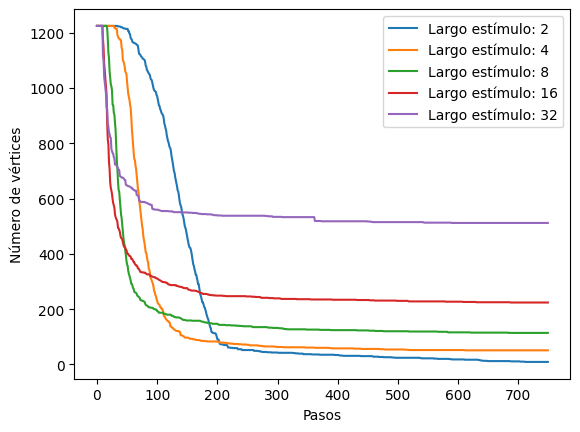

In [132]:
for i in range(len(lista_listas_ver)):
    plt.plot(lista_listas_ver[i], label = 'Largo estímulo: ' + str(largos_estim[i]))
plt.legend()
plt.xlabel('Pasos')
plt.ylabel('Número de vértices')

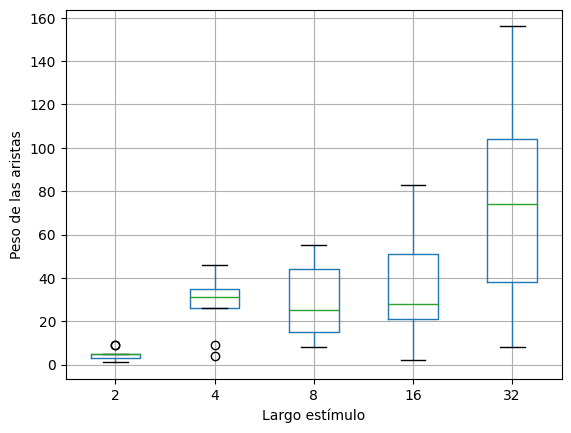

In [135]:
df = pd.DataFrame(data=list(zip(*listas_pesos)), columns=largos_estim)
df.boxplot()
plt.xlabel('Largo estímulo')
plt.ylabel('Peso de las aristas')
plt.show()

Con estimulos de largo l a distancia regular

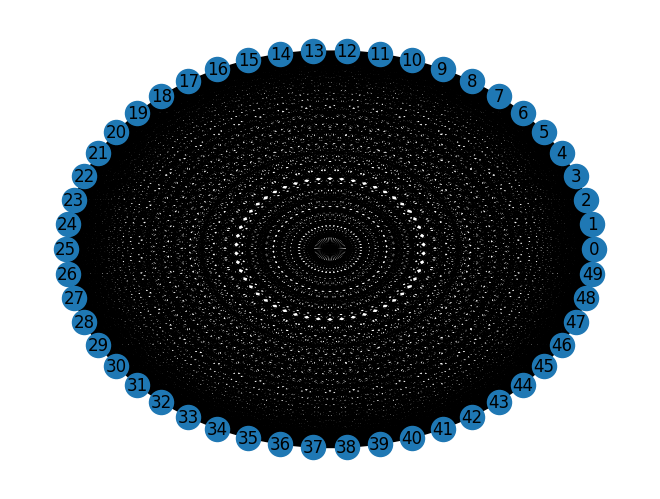

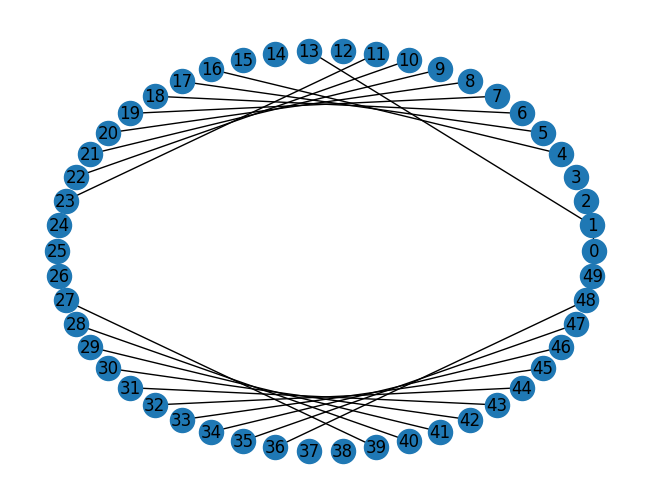

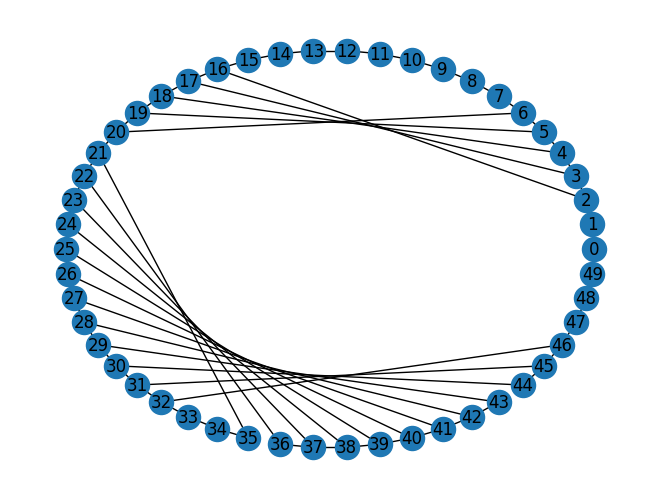

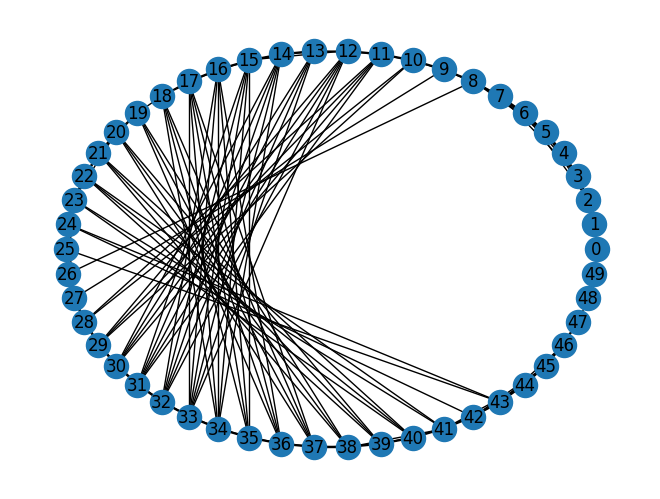

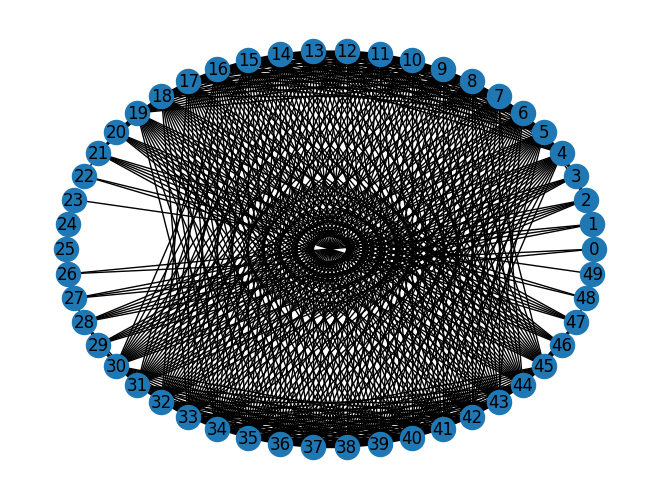

In [ ]:
largos_estim = [2, 4, 8, 16]
lista_listas_ver = []
listas_pesos = []
distancia_interestim = 10


nucleo, coclea = iniciar_red (n_neu, peso_inicial)
pos = nx.circular_layout(nucleo)
nx.draw(nucleo, pos, with_labels=True)
plt.show()

for l_estim in largos_estim:
  nro_vertices = []
  nucleo, coclea = iniciar_red (n_neu, peso_inicial)
  for i in range(pasos):
    
    estim = generar_estimulos_dist_reg(coclea, l_estim, distancia_interestim)

    edges_estimulo = vertices_estimulo(nucleo, estim)
    
    actualizar_pesos(nucleo, edges_estimulo, estim)
    
    eliminar_pesos_negativos(nucleo)

    nro_vertices.append(len(list(nucleo.edges())))
    
  pos = nx.circular_layout(nucleo)
  nx.draw(nucleo, pos, with_labels=True)
  plt.show()
  
  lista_listas_ver.append(nro_vertices)
  listas_pesos.append([nucleo[u][v]['weight'] for u, v in nucleo.edges()])

Text(0, 0.5, 'Número de vértices')

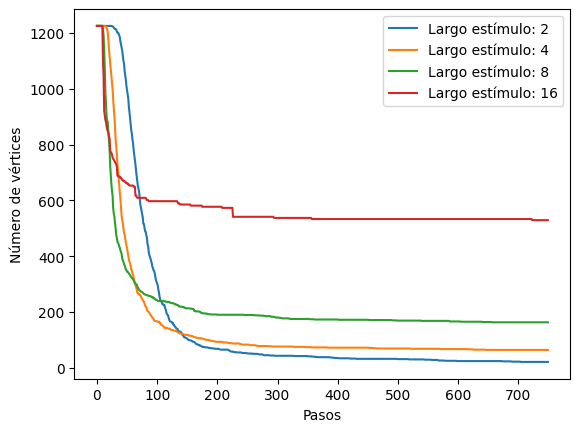

In [199]:
for i in range(len(lista_listas_ver)):
    plt.plot(lista_listas_ver[i], label = 'Largo estímulo: ' + str(largos_estim[i]))
plt.legend()
plt.xlabel('Pasos')
plt.ylabel('Número de vértices')

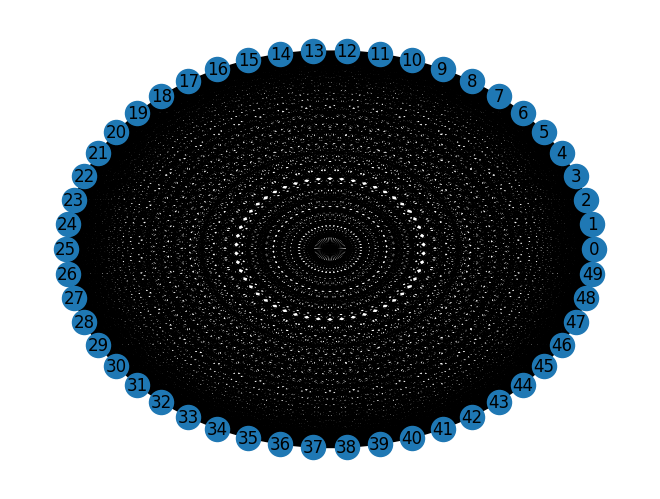

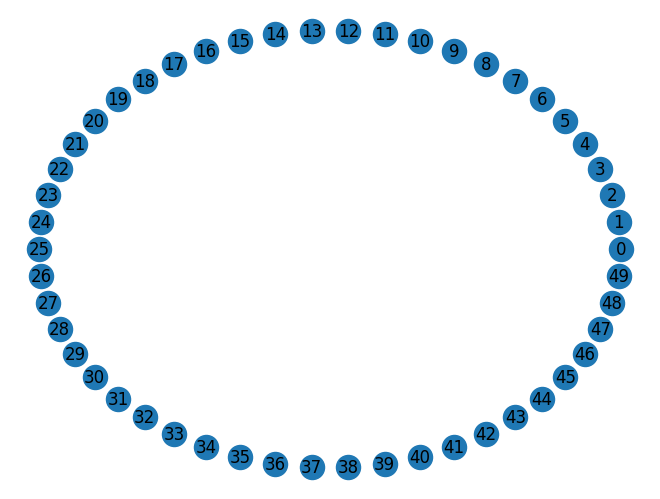

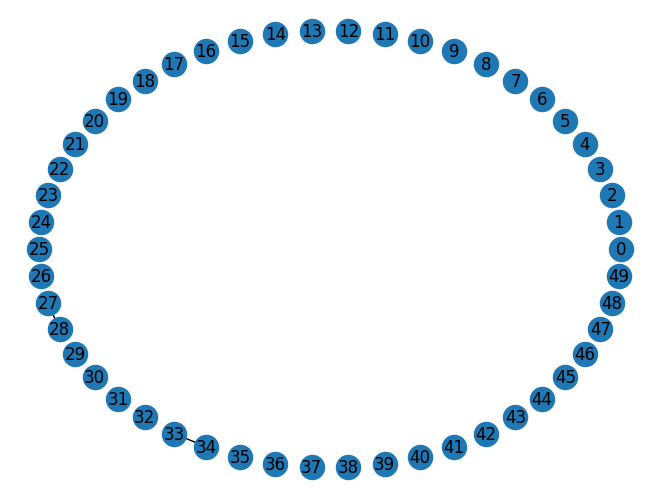

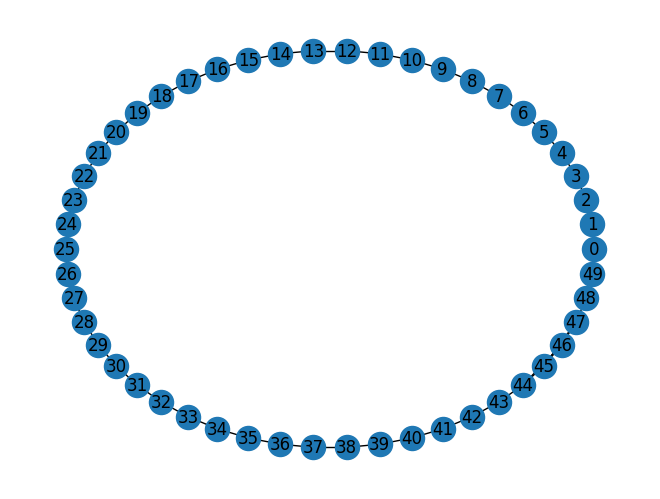

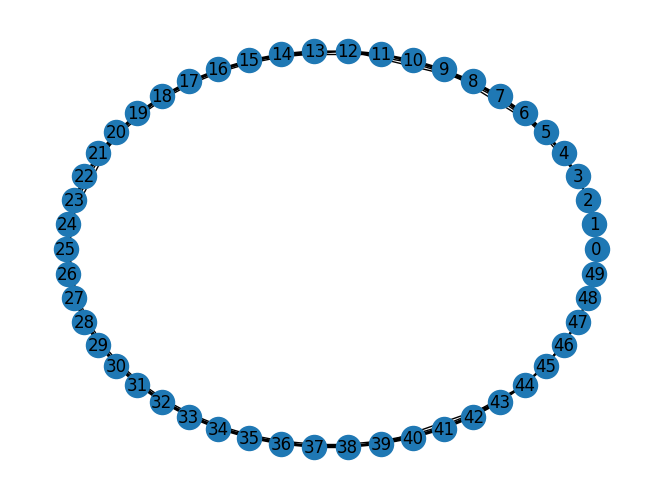

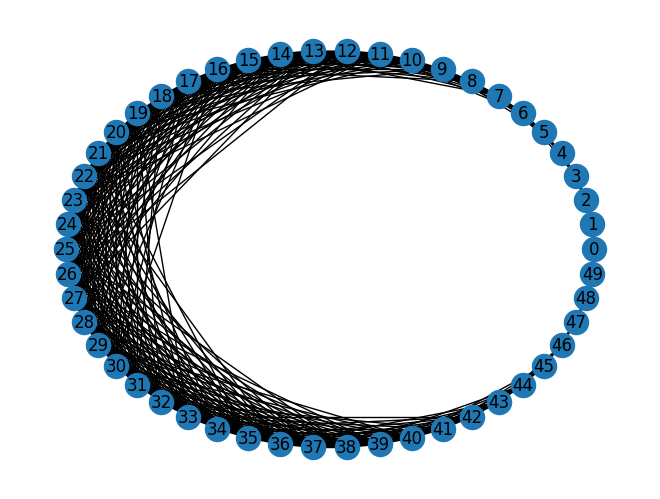

In [231]:
l_max = [2, 4, 8, 16, 32]
lista_listas_ver = []
listas_pesos = []
pasos = 700
nucleo, coclea = iniciar_red (n_neu, peso_inicial)
pos = nx.circular_layout(nucleo)
nx.draw(nucleo, pos, with_labels=True)
plt.show()

for l_estim in l_max:
  nro_vertices = []
  nucleo, coclea = iniciar_red (n_neu, peso_inicial)
  for i in range(pasos):
    
    estim = generar_estimulos_dist_rand(coclea, l_estim)

    edges_estimulo = vertices_estimulo(nucleo, estim)
    
    actualizar_pesos(nucleo, edges_estimulo, estim)
    
    eliminar_pesos_negativos(nucleo)

    nro_vertices.append(len(list(nucleo.edges())))
    
  pos = nx.circular_layout(nucleo)
  nx.draw(nucleo, pos, with_labels=True)
  plt.show()
  
  lista_listas_ver.append(nro_vertices)
  listas_pesos.append([nucleo[u][v]['weight'] for u, v in nucleo.edges()])


Text(0, 0.5, 'Número de vértices')

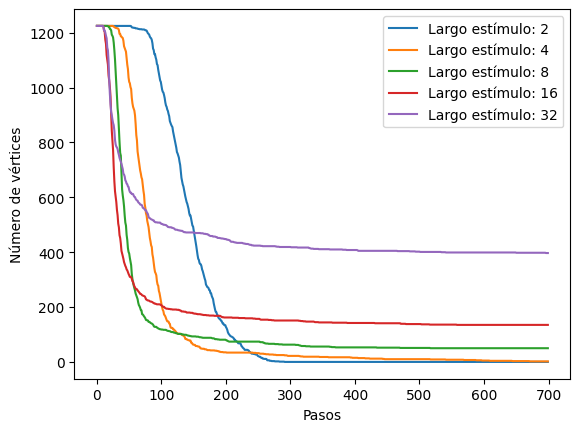

In [232]:
for i in range(len(lista_listas_ver)):
    plt.plot(lista_listas_ver[i], label = 'Largo estímulo: ' + str(largos_estim[i]))
plt.legend()
plt.xlabel('Pasos')
plt.ylabel('Número de vértices')